In [20]:

# all required library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os

#  visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")


Libraries imported successfully!


In [22]:

# load dataset


# load CSV file
df = pd.read_csv(r"C:\Users\Hero\Downloads\Raw_Data\balanced_ai_human_prompts.csv")

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")

#
print("\n First 5 rows:")
display(df.head(5))

Dataset loaded successfully!
Shape: 2750 rows × 2 columns

 First 5 rows:


,text,generated
0,"Machine learning, a subset of artificial intel...",1
1,"A decision tree, a prominent machine learning ...",1
2,"Education, a cornerstone of societal progress,...",1
3,"Computers, the backbone of modern technology, ...",1
4,"Chess, a timeless game of strategy and intelle...",1


In [24]:
#explore dataset

# basic info
print("\n Dataset Information:")
df.info()

# check missing value
print("\n Missing Values Check:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else " No missing values!")




 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2750 entries, 0 to 2749
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       2750 non-null   object
 1   generated  2750 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 43.1+ KB

 Missing Values Check:
 No missing values!


In [26]:
#text analysis function

# Function 1: Count punctuation
def count_punctuation(text):
    punct = '''!()-[]{};:'"\\,<>./?@#$%^&*_~'''
    return sum(1 for char in text if char in punct)

# Function 2: Calculate lexical diversity
def lexical_diversity(text):
    """ lexical diversity = (unique words / total words)"""
    words = text.lower().split()
    if len(words) == 0:
        return 0
    return len(set(words)) / len(words)

# Function 3: Count common words
common_words = {'the', 'be', 'to', 'of', 'and', 'a', 'in', 'that', 'have', 'i'}

def count_common_words(text):
    words = text.lower().split()
    return sum(1 for word in words if word in common_words)

print(" Created 3 text analysis functions")

 Created 3 text analysis functions


In [28]:
#new features for analysis

# 1. Basic text statistics
df['char_count'] = df['text'].apply(len)
df['word_count'] = df['text'].apply(lambda x: len(x.split()))
df['sentence_count'] = df['text'].apply(lambda x: len(re.split(r'[.!?]+', x)))

# 2. Average values
df['avg_word_length'] = df['char_count'] / df['word_count']
df['avg_sentence_length'] = df['word_count'] / df['sentence_count']

# 3. Character analysis
df['uppercase_count'] = df['text'].apply(lambda x: sum(1 for c in x if c.isupper()))
df['uppercase_ratio'] = df['uppercase_count'] / df['char_count']

# 4. Punctuation analysis
df['punctuation_count'] = df['text'].apply(count_punctuation)
df['punctuation_ratio'] = df['punctuation_count'] / df['char_count']

# 5. Vocabulary richness
df['lexical_diversity'] = df['text'].apply(lexical_diversity)

# 6. Common words analysis
df['common_words_count'] = df['text'].apply(count_common_words)
df['common_words_ratio'] = df['common_words_count'] / df['word_count']

print(" Created 12 new features!")
print(f"\n New features added:")
new_features = ['char_count', 'word_count', 'sentence_count', 
                'avg_word_length', 'avg_sentence_length', 'lexical_diversity',
                'common_words_ratio', 'punctuation_ratio']
print(new_features)

# new feature data
print("\n Sample with new features:")
display(df[[ 'word_count', 'avg_word_length', 
            'lexical_diversity', 'common_words_ratio']].head(5))

 Created 12 new features!

 New features added:
['char_count', 'word_count', 'sentence_count', 'avg_word_length', 'avg_sentence_length', 'lexical_diversity', 'common_words_ratio', 'punctuation_ratio']

 Sample with new features:


,word_count,avg_word_length,lexical_diversity,common_words_ratio
0,96,7.520833,0.760417,0.208333
1,103,7.514563,0.825243,0.174757
2,93,8.139785,0.827957,0.182796
3,92,7.804348,0.793478,0.239130
4,110,7.518182,0.754545,0.227273


In [36]:
#created source col

# Check what columns we have
print(f"Current columns: {list(df.columns)}")

# Create source column from genertaed column
    
if 'generated' in df.columns:
    print("\n Found 'generated' column")
    df['label'] = df['generated']
    df['source'] = df['label'].apply(lambda x: 'Human' if x == 0 else 'AI')
    print("\nCreated 'label' and 'source' columns from 'generated'")
    
print(f"\n 'source' column created!")
print(f"Source counts: \n{df['source'].value_counts()}")

print("\n First 5 rows:")
display(df[['text', 'label', 'source']].head(5))

Current columns: ['text', 'generated', 'char_count', 'word_count', 'sentence_count', 'avg_word_length', 'avg_sentence_length', 'uppercase_count', 'uppercase_ratio', 'punctuation_count', 'punctuation_ratio', 'lexical_diversity', 'common_words_count', 'common_words_ratio', 'label', 'source']

 Found 'generated' column

Created 'label' and 'source' columns from 'generated'

 'source' column created!
Source counts: 
source
AI       1375
Human    1375
Name: count, dtype: int64

 First 5 rows:


,text,label,source
0,"Machine learning, a subset of artificial intel...",1,AI
1,"A decision tree, a prominent machine learning ...",1,AI
2,"Education, a cornerstone of societal progress,...",1,AI
3,"Computers, the backbone of modern technology, ...",1,AI
4,"Chess, a timeless game of strategy and intelle...",1,AI


In [37]:
#statics summary

# Group by source and calculate statistics
numeric_cols = ['word_count', 'char_count', 'avg_word_length', 
                'lexical_diversity', 'common_words_ratio', 
                'punctuation_ratio']

print(" Basic Statistics by Source:")


# Create summary DataFrame
summary = pd.DataFrame()

for col in numeric_cols:
    human_stats = df[df['source'] == 'Human'][col].describe().rename(f'{col}_human')
    ai_stats = df[df['source'] == 'AI'][col].describe().rename(f'{col}_ai')
    summary = pd.concat([summary, human_stats, ai_stats], axis=1)

# Display 
summary_display = summary.T.round(3)
display(summary_display)

 Basic Statistics by Source:


,count,mean,std,min,25%,50%,75%,max
word_count_human,1375.0,556.769,159.493,268.000,447.500,525.000,639.000,1360.000
word_count_ai,1375.0,24.774,49.785,13.000,13.000,14.000,15.000,339.000
char_count_human,1375.0,3172.581,918.439,1486.000,2556.500,2987.000,3624.500,8436.000
char_count_ai,1375.0,169.265,342.693,78.000,90.000,95.000,100.000,2290.000
avg_word_length_human,1375.0,5.700,0.234,4.966,5.541,5.700,5.862,6.785
avg_word_length_ai,1375.0,6.774,0.540,5.353,6.385,6.714,7.077,8.462
lexical_diversity_human,1375.0,0.478,0.058,0.322,0.437,0.479,0.518,0.652
lexical_diversity_ai,1375.0,0.924,0.083,0.434,0.923,0.929,1.000,1.000
common_words_ratio_human,1375.0,0.224,0.029,0.079,0.207,0.225,0.243,0.331
common_words_ratio_ai,1375.0,0.333,0.049,0.145,0.308,0.333,0.357,0.467


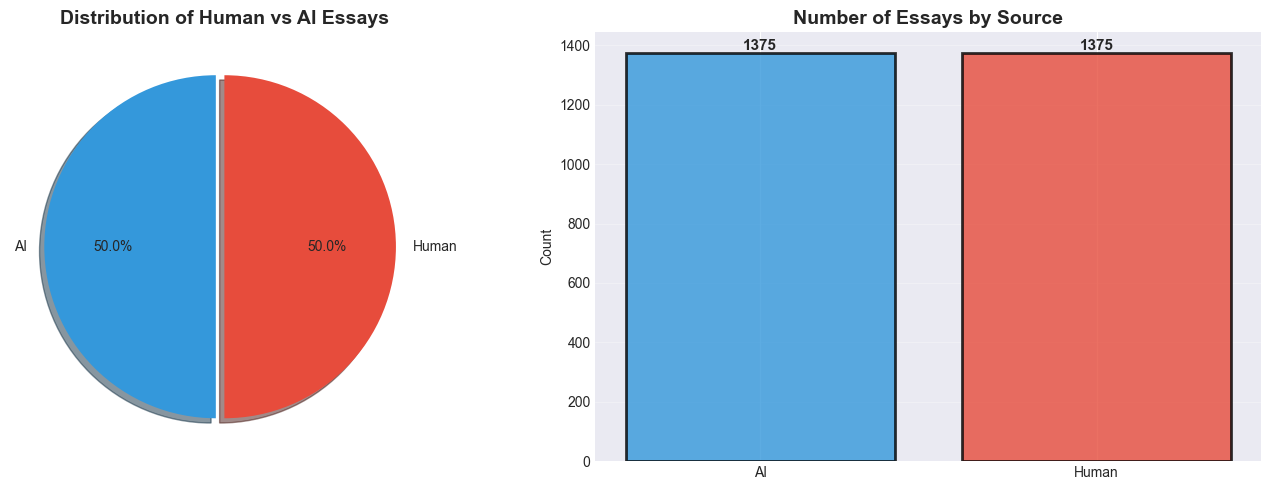

 Plot saved as 'distribution_plot.png'


In [38]:
#distribuation


fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Get counts
label_counts = df['source'].value_counts()
colors = ['#3498db', '#e74c3c']  # Blue for Human, Red for AI

# 1. Pie Chart
axes[0].pie(label_counts.values, labels=label_counts.index, autopct='%1.1f%%',
           colors=colors, startangle=90, explode=(0.05, 0), shadow=True)
axes[0].set_title('Distribution of Human vs AI Essays', fontweight='bold', size=14)

# 2. Bar Chart
bars = axes[1].bar(label_counts.index, label_counts.values, 
                  color=colors, alpha=0.8, edgecolor='black', linewidth=2)
axes[1].set_title('Number of Essays by Source', fontweight='bold', size=14)
axes[1].set_ylabel('Count')
axes[1].grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{int(height)}', ha='center', va='bottom', 
                fontweight='bold', fontsize=11)

plt.tight_layout()
plt.savefig('distribution_plot.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Plot saved as 'distribution_plot.png'")

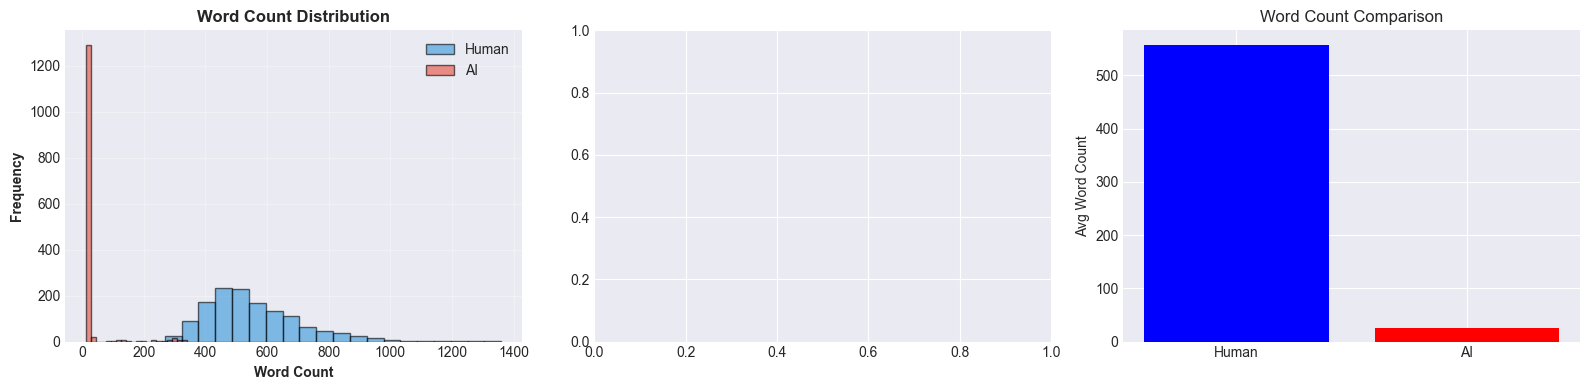

<Figure size 1200x600 with 0 Axes>

 Plot saved as 'word_count_analysis.png'


In [53]:
# word count analysis


fig, axes = plt.subplots(1, 3, figsize=(16, 4))

# 1. Histogram
for source, color in zip(['Human', 'AI'], colors):
    subset = df[df['source'] == source]
    axes[0].hist(subset['word_count'], bins=20, alpha=0.6, 
                label=source, color=color, edgecolor='black')
axes[0].set_xlabel('Word Count', fontweight='bold')
axes[0].set_ylabel('Frequency', fontweight='bold')
axes[0].set_title('Word Count Distribution', fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# 2
# Simple Bar Chart
human_avg = df[df['source'] == 'Human']['word_count'].mean()
ai_avg = df[df['source'] == 'AI']['word_count'].mean()

plt.bar(['Human', 'AI'], [human_avg, ai_avg], color=['blue', 'red'])
plt.ylabel('Avg Word Count')
plt.title('Word Count Comparison')
plt.tight_layout()
plt.savefig('word_count_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Density Plot
for source, color in zip(['Human', 'AI'], colors):
    subset = df[df['source'] == source]
    subset['word_count'].plot(kind='kde', ax=axes[2], label=source, 
                             color=color, linewidth=2)
axes[2].set_xlabel('Word Count', fontweight='bold')
axes[2].set_title('Word Count Density', fontweight='bold')
axes[2].legend()
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('word_count_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Plot saved as 'word_count_analysis.png'")

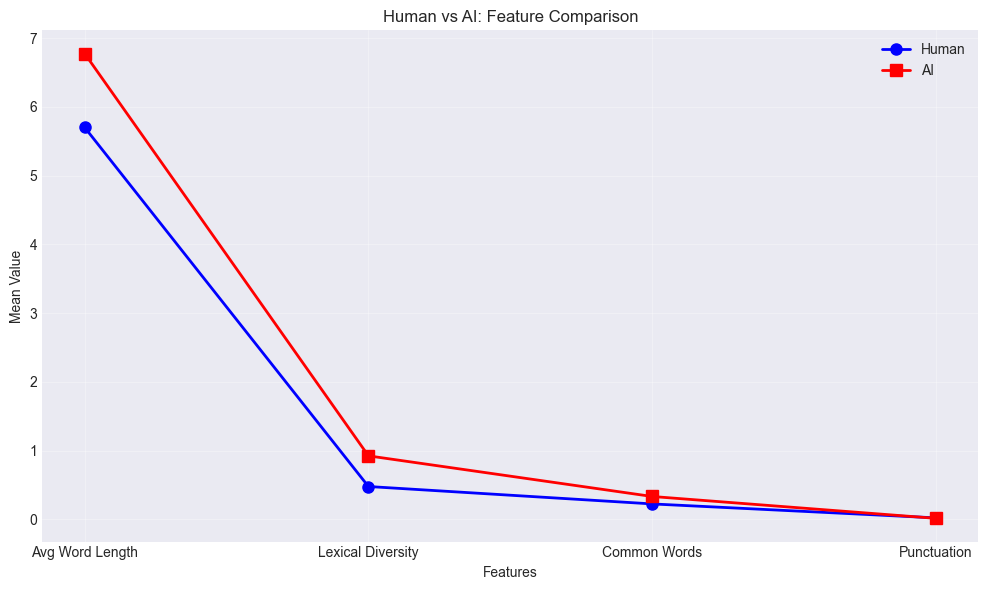

 Simple line chart created!


In [51]:
#line chart


# Define features to compare
features = ['avg_word_length', 'lexical_diversity', 'common_words_ratio', 'punctuation_ratio']
feature_names = ['Avg Word Length', 'Lexical Diversity', 'Common Words', 'Punctuation']

# Create figure
plt.figure(figsize=(10, 6))

# Get mean values for Human and AI
human_means = []
ai_means = []

for feature in features:
    human_means.append(df[df['source'] == 'Human'][feature].mean())
    ai_means.append(df[df['source'] == 'AI'][feature].mean())

# Create x positions
x = range(len(features))

# Plot Human line
plt.plot(x, human_means, 'o-', color='blue', linewidth=2, markersize=8, label='Human')

# Plot AI line
plt.plot(x, ai_means, 's-', color='red', linewidth=2, markersize=8, label='AI')

# Add labels
plt.xticks(x, feature_names)
plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.title('Human vs AI: Feature Comparison')
plt.legend()
plt.grid(True, alpha=0.3)

# Show plot
plt.tight_layout()
plt.show()

print(" Simple line chart created!")

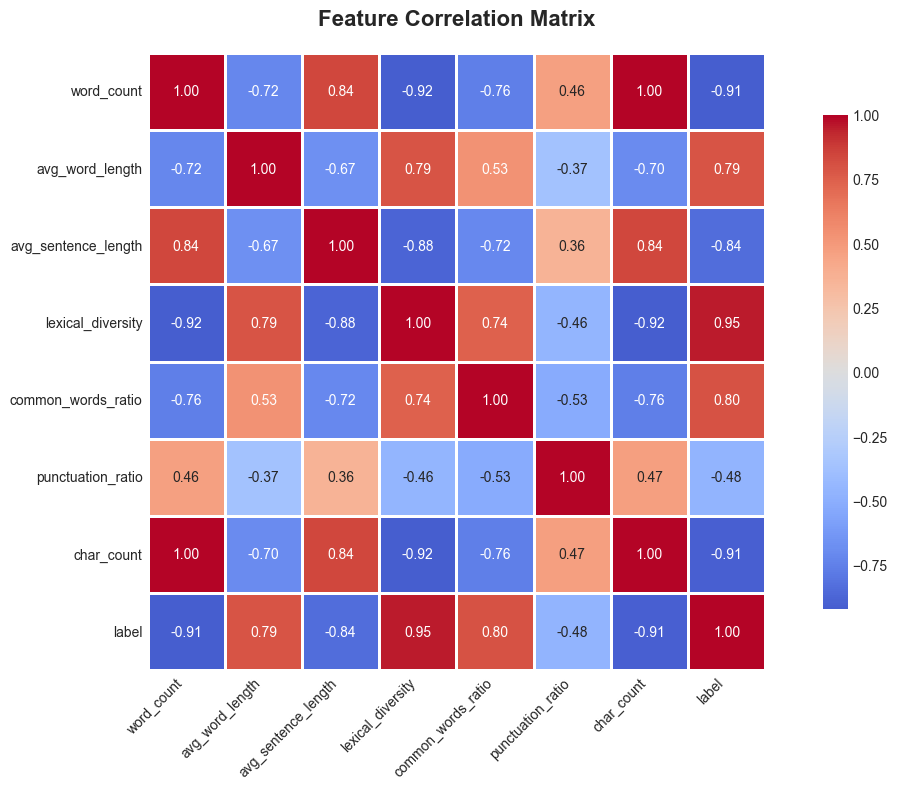

 Plot saved as 'correlation_heatmap.png'

 Top correlations with Label (AI=1, Human=0):
--------------------------------------------------
lexical_diversity        : +0.952
common_words_ratio       : +0.802
avg_word_length          : +0.791
punctuation_ratio        : -0.476
avg_sentence_length      : -0.845
char_count               : -0.908
word_count               : -0.914


In [42]:
#corelation heatmap


# Select numerical features
numeric_features = ['word_count', 'avg_word_length', 'avg_sentence_length',
                    'lexical_diversity', 'common_words_ratio', 'punctuation_ratio',
                    'char_count', 'label']

plt.figure(figsize=(12, 8))
correlation_matrix = df[numeric_features].corr()

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={'shrink': 0.8})

plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Plot saved as 'correlation_heatmap.png'")

# Print top correlations with label
print("\n Top correlations with Label (AI=1, Human=0):")
print("-" * 50)
corr_with_label = correlation_matrix['label'].sort_values(ascending=False)
for feature, corr in corr_with_label.items():
    if feature != 'label':
        print(f"{feature:25s}: {corr:+.3f}")

Creating scatter matrix... This might take a moment...


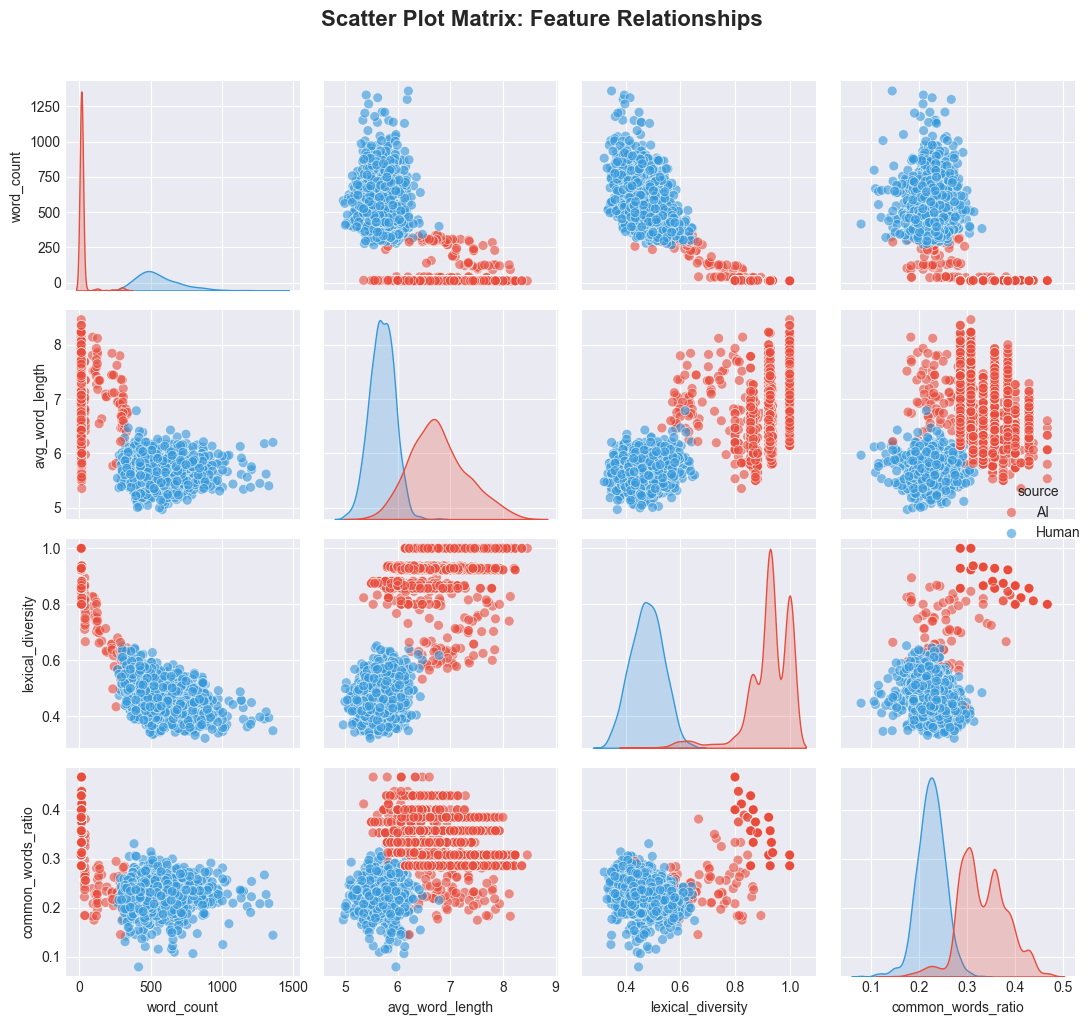

 Plot saved as 'scatter_matrix.png'


In [43]:
#scatter matrix


# Using Seaborn's pairplot for easier scatter matrix
selected_features = ['word_count', 'avg_word_length', 'lexical_diversity', 'common_words_ratio']


g = sns.pairplot(df[selected_features + ['source']], 
                 hue='source', 
                 palette={'Human': colors[0], 'AI': colors[1]},
                 diag_kind='kde',
                 plot_kws={'alpha': 0.6, 's': 50},
                 height=2.5)

g.fig.suptitle('Scatter Plot Matrix: Feature Relationships', 
               fontsize=16, fontweight='bold', y=1.02)

plt.tight_layout()
plt.savefig('scatter_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Plot saved as 'scatter_matrix.png'")

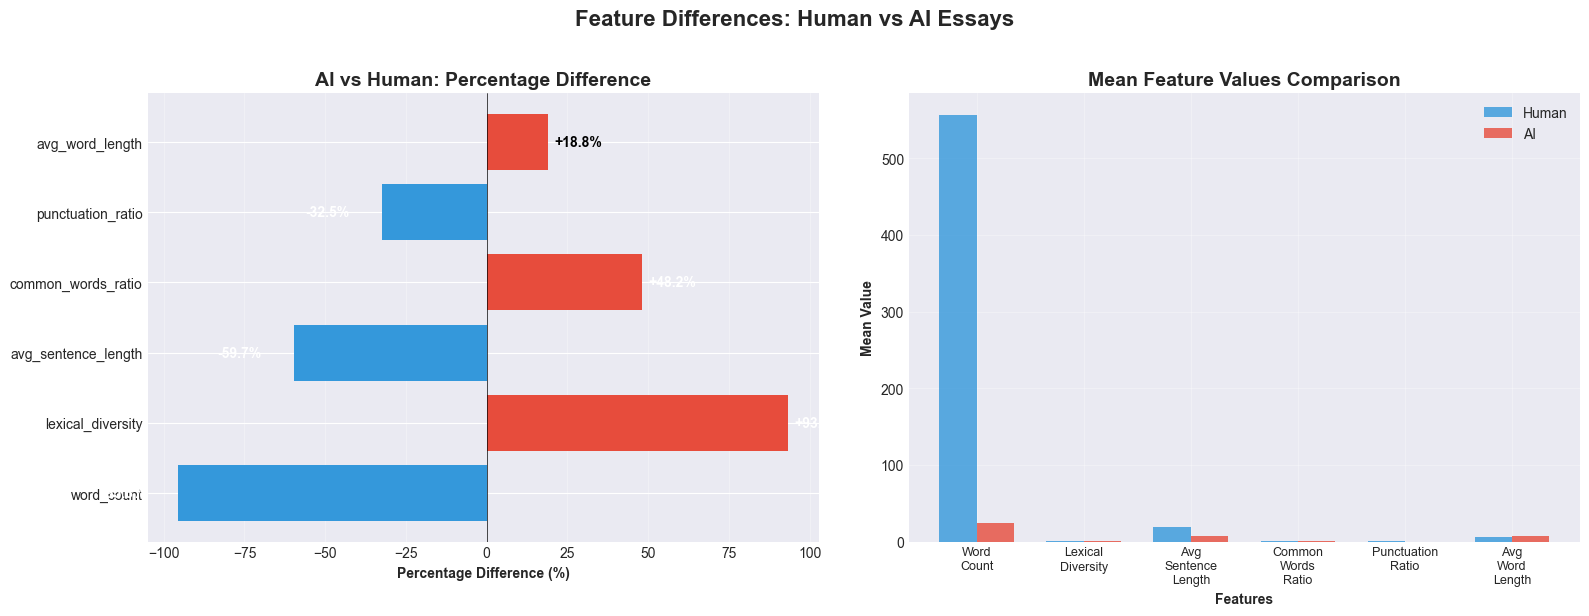

 Plot saved as 'feature_differences.png'


In [44]:
#feature difference

# Calculate percentage differences
feature_differences = []
for feature in ['avg_word_length', 'lexical_diversity', 'common_words_ratio',
                'punctuation_ratio', 'avg_sentence_length', 'word_count']:
    
    human_mean = df[df['source'] == 'Human'][feature].mean()
    ai_mean = df[df['source'] == 'AI'][feature].mean()
    
    diff_pct = ((ai_mean - human_mean) / human_mean) * 100
    feature_differences.append((feature, diff_pct, human_mean, ai_mean))

# Sort by absolute difference
feature_differences.sort(key=lambda x: abs(x[1]), reverse=True)

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Percentage differences
features, diffs, human_means, ai_means = zip(*feature_differences)

bars = ax1.barh(features, diffs, color=np.where(np.array(diffs) > 0, colors[1], colors[0]))
ax1.set_xlabel('Percentage Difference (%)', fontweight='bold')
ax1.set_title('AI vs Human: Percentage Difference', fontweight='bold', size=14)
ax1.grid(axis='x', alpha=0.3)
ax1.axvline(x=0, color='black', linestyle='-', linewidth=0.5)

# Add value labels
for bar, diff in zip(bars, diffs):
    color = 'white' if abs(diff) > 20 else 'black'
    ax1.text(bar.get_width() + (2 if diff > 0 else -10), 
             bar.get_y() + bar.get_height()/2,
             f'{diff:+.1f}%', 
             va='center', ha='left' if diff > 0 else 'right',
             color=color, fontweight='bold', fontsize=10)

# Plot 2: Side-by-side comparison
x = np.arange(len(features))
width = 0.35

bars1 = ax2.bar(x - width/2, human_means, width, label='Human', color=colors[0], alpha=0.8)
bars2 = ax2.bar(x + width/2, ai_means, width, label='AI', color=colors[1], alpha=0.8)

ax2.set_xlabel('Features', fontweight='bold')
ax2.set_ylabel('Mean Value', fontweight='bold')
ax2.set_title('Mean Feature Values Comparison', fontweight='bold', size=14)
ax2.set_xticks(x)
ax2.set_xticklabels([f.replace('_', '\n').title() for f in features], fontsize=9)
ax2.legend()
ax2.grid(alpha=0.3)

plt.suptitle('Feature Differences: Human vs AI Essays', fontweight='bold', size=16, y=1.02)
plt.tight_layout()
plt.savefig('feature_differences.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Plot saved as 'feature_differences.png'")

In [45]:
#key insight



# Find most different feature
most_diff_feature = feature_differences[0][0]
most_diff_value = feature_differences[0][1]

print(f"\n1️  MOST SIGNIFICANT DIFFERENCE:")
print(f"   Feature: {most_diff_feature.replace('_', ' ').title()}")
print(f"   Difference: {most_diff_value:+.1f}%")
print(f"   Interpretation: AI essays have {abs(most_diff_value):.1f}% {'higher' if most_diff_value > 0 else 'lower'} {most_diff_feature.replace('_', ' ')}")

print(f"\n2️  WORD COUNT ANALYSIS:")
word_count_diff = next(diff for feat, diff, _, _ in feature_differences if feat == 'word_count')
if word_count_diff > 0:
    print(f"   AI essays are {word_count_diff:.1f}% LONGER than human essays")
else:
    print(f"   AI essays are {abs(word_count_diff):.1f}% SHORTER than human essays")

print(f"\n3️  VOCABULARY ANALYSIS:")
lex_diff = next(diff for feat, diff, _, _ in feature_differences if feat == 'lexical_diversity')
if lex_diff > 0:
    print(f"   AI uses {lex_diff:.1f}% MORE diverse vocabulary")
else:
    print(f"   Human uses {abs(lex_diff):.1f}% MORE diverse vocabulary")

print(f"\n4️  WRITING STYLE:")
print(f"   Average Word Length:")
word_len_diff = next(diff for feat, diff, _, _ in feature_differences if feat == 'avg_word_length')
print(f"   • AI uses words that are {abs(word_len_diff):.1f}% {'longer' if word_len_diff > 0 else 'shorter'}")

print(f"\n5️  COMMON WORD USAGE:")
common_diff = next(diff for feat, diff, _, _ in feature_differences if feat == 'common_words_ratio')
print(f"   • AI uses {abs(common_diff):.1f}% {'more' if common_diff > 0 else 'fewer'} common words")

print(f"\n6️ DATASET SUMMARY:")
print(f"   Total essays analyzed: {len(df):,}")
print(f"   Human essays: {len(df[df['source'] == 'Human']):,}")
print(f"   AI essays: {len(df[df['source'] == 'AI']):,}")
print(f"   Balance: {len(df[df['source'] == 'Human'])/len(df)*100:.1f}% Human, {len(df[df['source'] == 'AI'])/len(df)*100:.1f}% AI")


1️  MOST SIGNIFICANT DIFFERENCE:
   Feature: Word Count
   Difference: -95.6%
   Interpretation: AI essays have 95.6% lower word count

2️  WORD COUNT ANALYSIS:
   AI essays are 95.6% SHORTER than human essays

3️  VOCABULARY ANALYSIS:
   AI uses 93.4% MORE diverse vocabulary

4️  WRITING STYLE:
   Average Word Length:
   • AI uses words that are 18.8% longer

5️  COMMON WORD USAGE:
   • AI uses 48.2% more common words

6️ DATASET SUMMARY:
   Total essays analyzed: 2,750
   Human essays: 1,375
   AI essays: 1,375
   Balance: 50.0% Human, 50.0% AI


In [49]:
# export result


# 1. Save enhanced dataset
df.to_csv('enhanced_ai_human_analysis.csv', index=False)
print(" 1. Enhanced dataset saved: 'enhanced_ai_human_analysis.csv'")

# 2. Create and save summary table
summary_table = pd.DataFrame(feature_differences, 
                            columns=['Feature', 'Difference_%', 'Human_Mean', 'AI_Mean'])
summary_table.to_csv('feature_differences_summary.csv', index=False)
print(" 2. Feature differences saved: 'feature_differences_summary.csv'")






with open('analysis_report.txt', 'w') as f:
    f.write(insights)

print(" 3. Analysis report saved: 'analysis_report.txt'")

print("\n ALL FILES CREATED:")
print("-" * 40)
print("Data Files:")
print("  • enhanced_ai_human_analysis.csv")
print("  • feature_differences_summary.csv")
print("  • analysis_report.txt")
print("\nVisualization Files:")
print("  • distribution_plot.png")
print("  • word_count_analysis.png")
print("  • feature_comparison.png")
print("  • correlation_heatmap.png")
print("  • scatter_matrix.png")
print("  • feature_differences.png")

 1. Enhanced dataset saved: 'enhanced_ai_human_analysis.csv'
 2. Feature differences saved: 'feature_differences_summary.csv'
 3. Analysis report saved: 'analysis_report.txt'

 ALL FILES CREATED:
----------------------------------------
Data Files:
  • enhanced_ai_human_analysis.csv
  • feature_differences_summary.csv
  • analysis_report.txt

Visualization Files:
  • distribution_plot.png
  • word_count_analysis.png
  • feature_comparison.png
  • correlation_heatmap.png
  • scatter_matrix.png
  • feature_differences.png


In [56]:
df.to_csv("df.csv", index=False)
